#### Ask phase 
1. Buisness Task: 
Perform Exploratory Data Analysis (EDA) on dataset ‘SampleSuperstore and as business manager, find the weak areas to work to make more profit and Discovering the weak areas of the sales deparment in order to improve the sales.
2. Data Used: 
The data used for our Exploratory Data Analysis(EDA) is a sample data Provided it self by Spark foundation and This data is also stored on Kaggle by Aman Sharma.
3. Process Phase:
For this case study we would be using Python Programming language. Your Data analysis Toolbox should include python as it has amazing verity of packages for data Analysis i,e. Analyzing Numerical Data with 'NumPy', Tabular data with 'Pandas', data visualization 'Matplotlib' and many more. Visit here to know more!

In [1]:
# Importing required libraries
# basic libraries
import pandas as pd 
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# visualization libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

## Read data


In [2]:
# Read data

data = pd.read_csv("/kaggle/input/sample-supermarket-dataset/SampleSuperstore.csv")


In [3]:
#view first 5 rows train data
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
#iris data
print("There are " + str(len(data)) + " observations in the sample-supermarket-dataset")
print("There are " + str(len(data.columns)) + " variables in the dataset.")

There are 9994 observations in the sample-supermarket-dataset
There are 13 variables in the dataset.


## Statistical Analysis of Data

In [5]:
data.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

In [6]:
print(data.shape)

(9994, 13)


In [18]:
data.ndim


2

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9977 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9977 non-null   object 
 1   Segment       9977 non-null   object 
 2   Country       9977 non-null   object 
 3   City          9977 non-null   object 
 4   State         9977 non-null   object 
 5   Postal Code   9977 non-null   int64  
 6   Region        9977 non-null   object 
 7   Category      9977 non-null   object 
 8   Sub-Category  9977 non-null   object 
 9   Sales         9977 non-null   float64
 10  Quantity      9977 non-null   int64  
 11  Discount      9977 non-null   float64
 12  Profit        9977 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1.1+ MB


In [16]:
data.describe(include = "all")

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
count,9977,9977,9977,9977,9977,9977.000000,9977,9977,9977,9977.000000,9977.000000,9977.000000,9977.00000
unique,4,3,1,531,49,NaN,4,3,17,NaN,NaN,NaN,NaN
top,Standard Class,Consumer,United States,New York City,California,NaN,West,Office Supplies,Binders,NaN,NaN,NaN,NaN
freq,5955,5183,9977,914,1996,NaN,3193,6012,1522,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,55154.964117,NaN,NaN,NaN,230.148902,3.790719,0.156278,28.69013
std,NaN,NaN,NaN,NaN,NaN,32058.266816,NaN,NaN,NaN,623.721409,2.226657,0.206455,234.45784
min,NaN,NaN,NaN,NaN,NaN,1040.000000,NaN,NaN,NaN,0.444000,1.000000,0.000000,-6599.97800
25%,NaN,NaN,NaN,NaN,NaN,23223.000000,NaN,NaN,NaN,17.300000,2.000000,0.000000,1.72620
50%,NaN,NaN,NaN,NaN,NaN,55901.000000,NaN,NaN,NaN,54.816000,3.000000,0.200000,8.67100
75%,NaN,NaN,NaN,NaN,NaN,90008.000000,NaN,NaN,NaN,209.970000,5.000000,0.200000,29.37200


# Cleaning The Data

In [8]:
# checking missing values
data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [9]:
print("Total number of duplicate data: ",data.duplicated().sum())

Total number of duplicate data:  17


In [11]:
data.drop_duplicates(inplace = True)

In [12]:
print("Total number of duplicate data after update: ",data.duplicated().sum())

Total number of duplicate data after update:  0


In [19]:

Cat = [i for i in data.columns if data.dtypes[i] == 'object']
for j in Cat:
    print('\033[95m' + j + '\033[0m')
    print(sorted(data[j].unique()))

Ship Mode
['First Class', 'Same Day', 'Second Class', 'Standard Class']
Segment
['Consumer', 'Corporate', 'Home Office']
Country
['United States']
City
['Aberdeen', 'Abilene', 'Akron', 'Albuquerque', 'Alexandria', 'Allen', 'Allentown', 'Altoona', 'Amarillo', 'Anaheim', 'Andover', 'Ann Arbor', 'Antioch', 'Apopka', 'Apple Valley', 'Appleton', 'Arlington', 'Arlington Heights', 'Arvada', 'Asheville', 'Athens', 'Atlanta', 'Atlantic City', 'Auburn', 'Aurora', 'Austin', 'Avondale', 'Bakersfield', 'Baltimore', 'Bangor', 'Bartlett', 'Bayonne', 'Baytown', 'Beaumont', 'Bedford', 'Belleville', 'Bellevue', 'Bellingham', 'Bethlehem', 'Beverly', 'Billings', 'Bloomington', 'Boca Raton', 'Boise', 'Bolingbrook', 'Bossier City', 'Bowling Green', 'Boynton Beach', 'Bozeman', 'Brentwood', 'Bridgeton', 'Bristol', 'Broken Arrow', 'Broomfield', 'Brownsville', 'Bryan', 'Buffalo', 'Buffalo Grove', 'Bullhead City', 'Burbank', 'Burlington', 'Caldwell', 'Camarillo', 'Cambridge', 'Canton', 'Carlsbad', 'Carol Stream'

In [14]:
columns = ["Ship Mode","Segment","Country","Region","Category","Sub-Category"]
for i in columns:
    print("{} : {}".format(i,data[i].unique()))

Ship Mode : ['Second Class' 'Standard Class' 'First Class' 'Same Day']
Segment : ['Consumer' 'Corporate' 'Home Office']
Country : ['United States']
Region : ['South' 'West' 'Central' 'East']
Category : ['Furniture' 'Office Supplies' 'Technology']
Sub-Category : ['Bookcases' 'Chairs' 'Labels' 'Tables' 'Storage' 'Furnishings' 'Art'
 'Phones' 'Binders' 'Appliances' 'Paper' 'Accessories' 'Envelopes'
 'Fasteners' 'Supplies' 'Machines' 'Copiers']


In [22]:
#clear Country that hne identical element
clean_data=data.drop(['Country','Postal Code'], axis=1)

In [23]:
# Unit Profit calculation
clean_data['Unit Price'] = clean_data.Sales / clean_data.Quantity

# Unit Profit calculation
clean_data['Unit Profit'] = clean_data.Profit / clean_data.Quantity 

### Cleaneing Data Preview 

In [24]:
clean_data

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Unit Price,Unit Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136,130.9800,20.9568
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820,243.9800,73.1940
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714,7.3100,3.4357
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310,191.5155,-76.6062
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164,11.1840,1.2582
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,Miami,Florida,South,Furniture,Furnishings,25.2480,3,0.20,4.1028,8.4160,1.3676
9990,Standard Class,Consumer,Costa Mesa,California,West,Furniture,Furnishings,91.9600,2,0.00,15.6332,45.9800,7.8166
9991,Standard Class,Consumer,Costa Mesa,California,West,Technology,Phones,258.5760,2,0.20,19.3932,129.2880,9.6966
9992,Standard Class,Consumer,Costa Mesa,California,West,Office Supplies,Paper,29.6000,4,0.00,13.3200,7.4000,3.3300


## EDA and Visualization The Data

#### Checking Outiers in our data

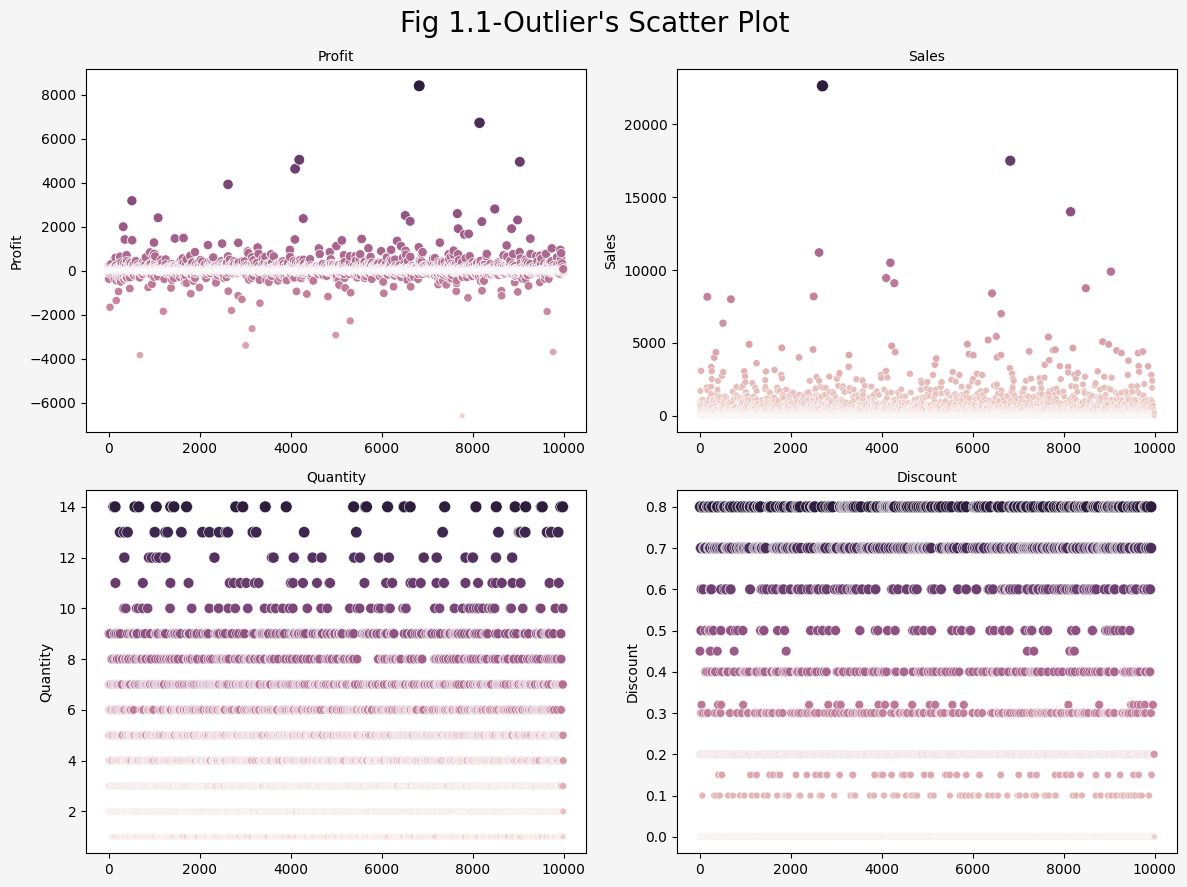

In [20]:

fig, axs = plt.subplots(nrows = 2, ncols = 2, figsize=(12, 9));
fig.patch.set_facecolor('#f6f5f5')
sns.scatterplot(data = data,y="Profit", x = data.index, ax = axs[0][0],hue = "Profit", size = "Profit" , legend = False)
axs[0][0].set_title('Profit', fontsize = 10)

sns.scatterplot(data=data, y ="Sales", x = data.index, ax = axs[0][1], hue ="Sales", size = "Sales" , legend=False)
axs[0][1].set_title('Sales', fontsize = 10)

sns.scatterplot(data=data, y = "Quantity", x = data.index, ax = axs[1][0], hue = "Quantity", size = "Quantity", legend=False)
axs[1][0].set_title('Quantity', fontsize = 10)

sns.scatterplot(data= data, y = "Discount", x = data.index, ax = axs[1][1], hue = "Discount", size = "Discount", legend=False)
axs[1][1].set_title('Discount', fontsize = 10)
plt.suptitle("Fig 1.1-Outlier's Scatter Plot",fontsize = 20)


plt.tight_layout()

### how data look when our data get ride of outliers lets see


/tmp/ipykernel_33/2897255590.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data_outliers = data_outliers[data["Sales"]<498.93] ; data_outliers = data_outliers[data_outliers["Quantity"]<9.5]


The total number of records containing outliers = 2868
The outliers forms 28.75% of superstore's dataset


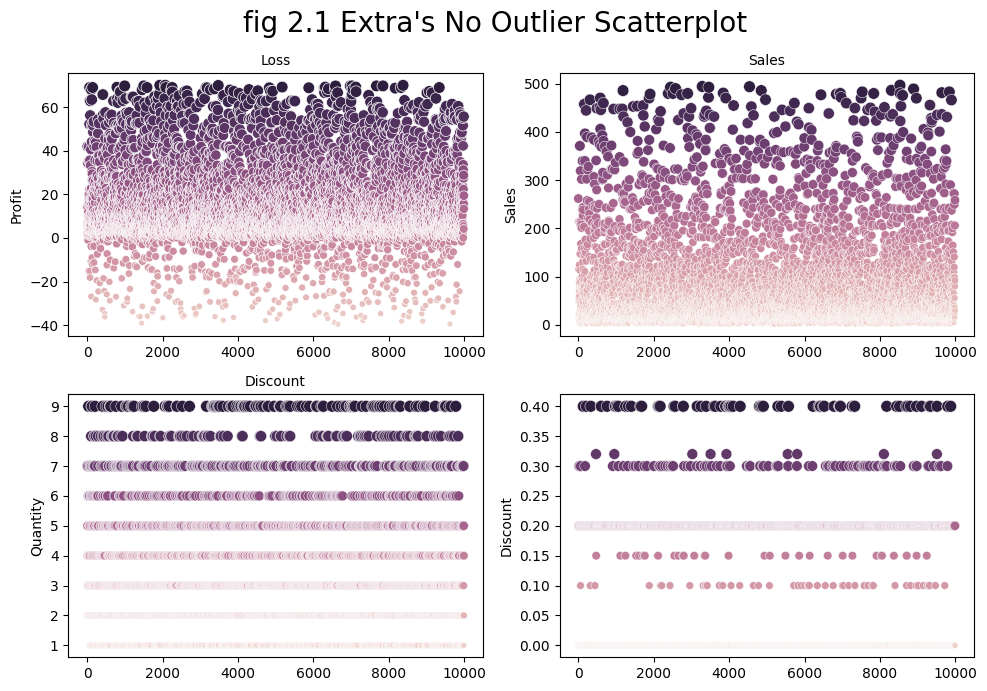

In [21]:

data_outliers = data[data["Profit"]<70]; data_outliers = data_outliers[data_outliers["Profit"]>-40]
data_outliers = data_outliers[data["Sales"]<498.93] ; data_outliers = data_outliers[data_outliers["Quantity"]<9.5]
data_outliers = data_outliers[data_outliers["Discount"]<0.5]


print(f"The total number of records containing outliers = {data.shape[0]-data_outliers.shape[0]}\nThe outliers forms {round((data.shape[0]-data_outliers.shape[0])/data.shape[0]*100,2)}% of superstore's dataset")
fig, axs = plt.subplots(nrows = 2, ncols = 2, figsize=(10, 7));

sns.scatterplot(data=data_outliers, y = "Profit", x = data_outliers.index, ax = axs[0][0], hue="Profit", size="Profit", legend=False)
sns.scatterplot(data=data_outliers, y = "Sales", x = data_outliers.index, ax = axs[0][1], hue ="Sales", size ="Sales", legend=False)
sns.scatterplot(data=data_outliers,y = "Quantity",x = data_outliers.index, ax = axs[1][0], hue = "Quantity", size ="Quantity", legend=False)
sns.scatterplot(data=data_outliers,y = "Discount",x = data_outliers.index, ax = axs[1][1], hue = "Discount", size = "Discount", legend=False)
axs[0][0].set_title('Loss', fontsize = 10)
axs[0][1].set_title('Sales', fontsize = 10)
axs[1][0].set_title('Quantity', fontsize = 10)
axs[1][0].set_title('Discount', fontsize = 10)
plt.suptitle("fig 2.1 Extra's No Outlier Scatterplot",fontsize=20)
plt.tight_layout()

### Overview clean data analysis

In [25]:
clean_data.describe(include="all")

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Unit Price,Unit Profit
count,9977,9977,9977,9977,9977,9977,9977,9977.000000,9977.000000,9977.000000,9977.00000,9977.000000,9977.000000
unique,4,3,531,49,4,3,17,NaN,NaN,NaN,NaN,NaN,NaN
top,Standard Class,Consumer,New York City,California,West,Office Supplies,Binders,NaN,NaN,NaN,NaN,NaN,NaN
freq,5955,5183,914,1996,3193,6012,1522,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,230.148902,3.790719,0.156278,28.69013,60.985982,7.808093
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,623.721409,2.226657,0.206455,234.45784,143.029806,56.122146
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.444000,1.000000,0.000000,-6599.97800,0.336000,-1319.995600
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.300000,2.000000,0.000000,1.72620,5.472000,0.719400
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.816000,3.000000,0.200000,8.67100,16.272000,2.766400
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,209.970000,5.000000,0.200000,29.37200,63.940000,8.741200


In [32]:
one_hot_encoded_data = pd.get_dummies(clean_data)

# EDA and Visualization of the data

### 1. Sales vs. Profit

Text(0.5, 1.0, 'Sales vs. Profit')

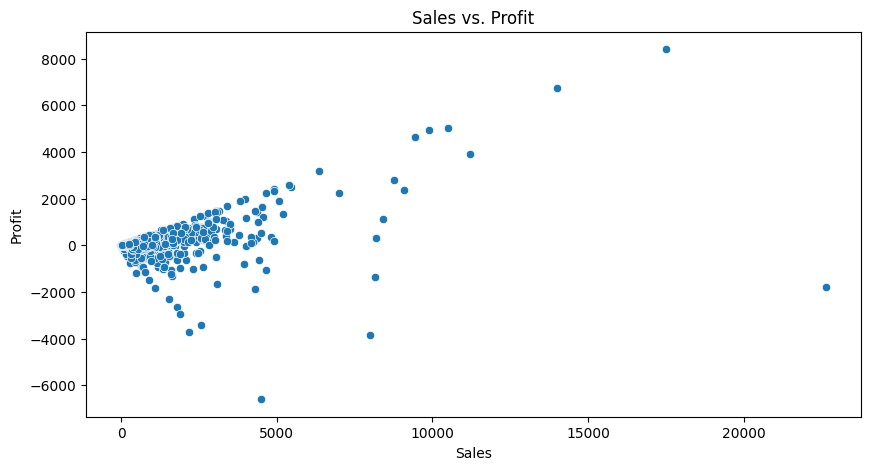

In [30]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x="Sales", y="Profit", data=clean_data)
plt.title("Sales vs. Profit")

### 2.Sales and Profit based on region

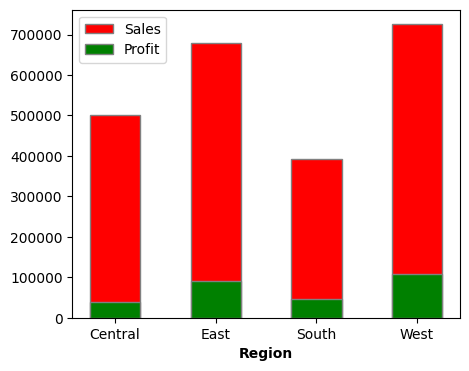

In [38]:
fig = plt.figure(figsize = (5, 4))
plt.bar(region_sales_profit.index, region_sales_profit["Sales"]["sum"], color ='r', width = 0.5, edgecolor ='grey', label = 'Sales')
plt.bar(region_sales_profit.index, region_sales_profit["Profit"]["sum"], color = 'g', width = 0.5, edgecolor ='grey', label = 'Profit')
plt.xlabel('Region', fontweight ='bold', fontsize = 10)
plt.legend()
plt.show()

In [36]:
#Sales and Profit based on Region
region_sales_profit = clean_data.groupby("Region")[["Sales","Profit"]].agg([sum])
region_sales_profit

,Sales,Profit
,sum,sum
Region,,
Central,500782.8528,39655.8752
East,678435.1960,91506.3092
South,391721.9050,46749.4303
West,725255.6365,108329.8079


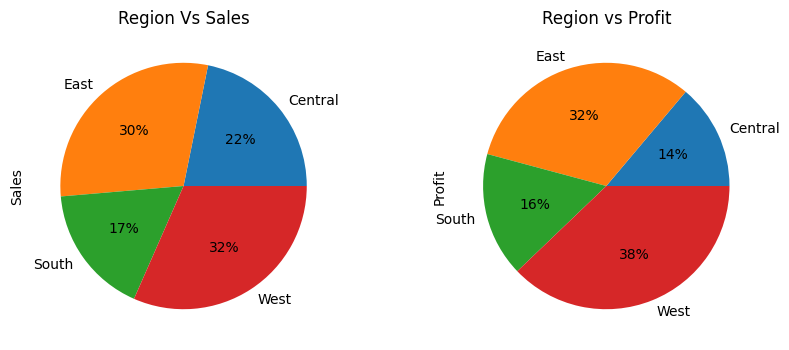

In [37]:
fig = plt.figure(figsize = (10, 4))
plt.subplot(1, 2, 1)
clean_data.groupby("Region")["Sales"].sum().plot.pie(autopct = "%1.0f%%")
plt.title("Region Vs Sales")
plt.subplot(1, 2, 2)
clean_data.groupby("Region")["Profit"].sum().plot.pie(autopct = "%1.0f%%")
plt.title("Region vs Profit")
plt.show()

### 3.Sales and Profit based on Segemnt

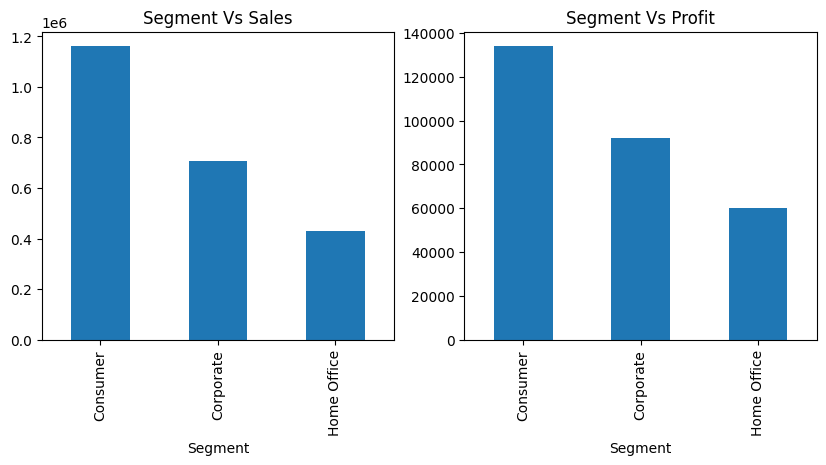

In [39]:
fig = plt.figure(figsize = (10, 4))
plt.subplot(1, 2, 1)
clean_data.groupby("Segment").Sales.sum().plot.bar()
plt.title("Segment Vs Sales")
plt.subplot(1, 2, 2)
clean_data.groupby("Segment").Profit.sum().plot.bar()
plt.title("Segment Vs Profit")
plt.show()

### 4.Sales and Profit based on Category

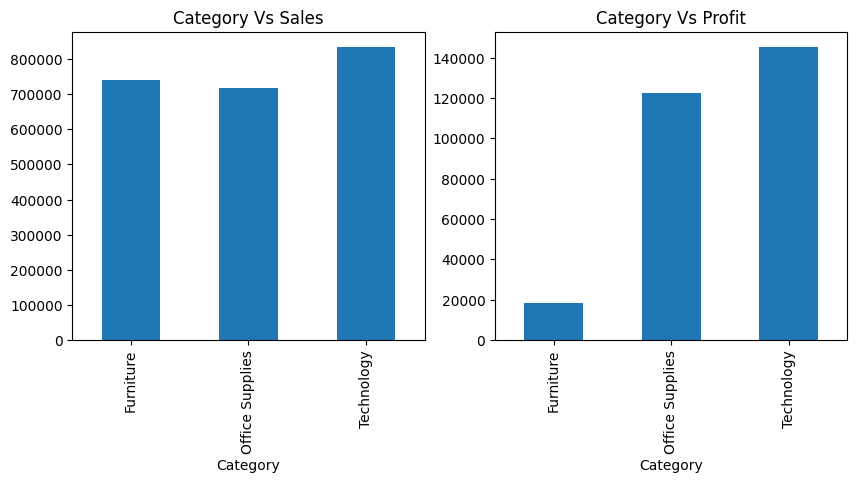

In [41]:
fig = plt.figure(figsize = (10, 4))
plt.subplot(1, 2, 1)
clean_data.groupby("Category").Sales.sum().plot.bar()
plt.title("Category Vs Sales")
plt.subplot(1, 2, 2)
clean_data.groupby("Category").Profit.sum().plot.bar()
plt.title("Category Vs Profit")
plt.show()

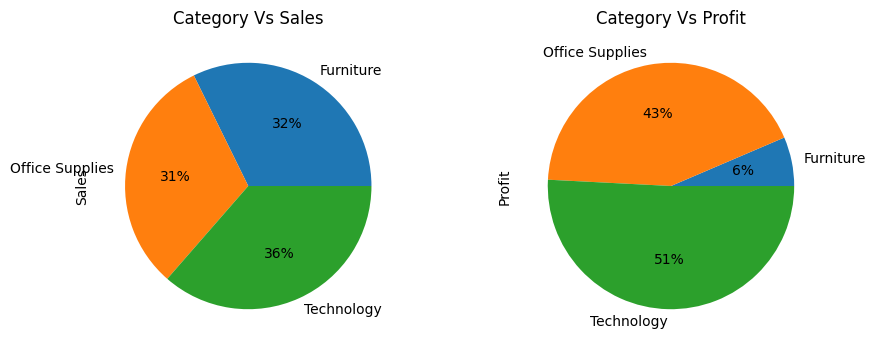

In [44]:
fig = plt.figure(figsize = (10, 4))
plt.subplot(1, 2, 1)
clean_data.groupby("Category")["Sales"].sum().plot.pie(autopct = "%1.0f%%")
plt.title("Category Vs Sales")
plt.subplot(1, 2, 2)
clean_data.groupby("Category")["Profit"].sum().plot.pie(autopct = "%1.0f%%")
plt.title("Category Vs Profit")
plt.show()

### 5.Sales and Profit based on State 

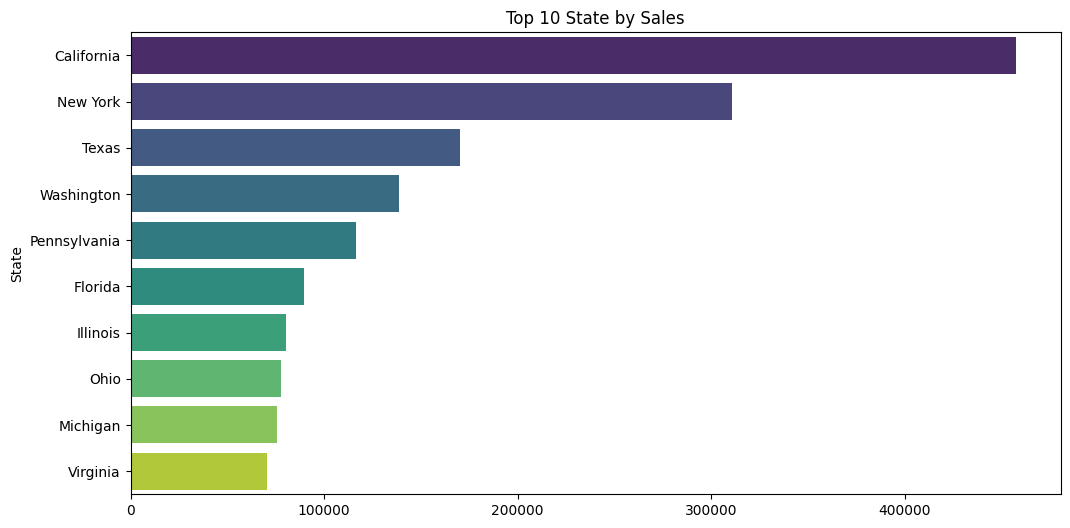

In [47]:
top_sales=clean_data.groupby("State").Sales.sum().sort_values(ascending = False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_sales.values, y=top_sales.index, palette="viridis")
plt.title("Top 10 State by Sales")
plt.show()

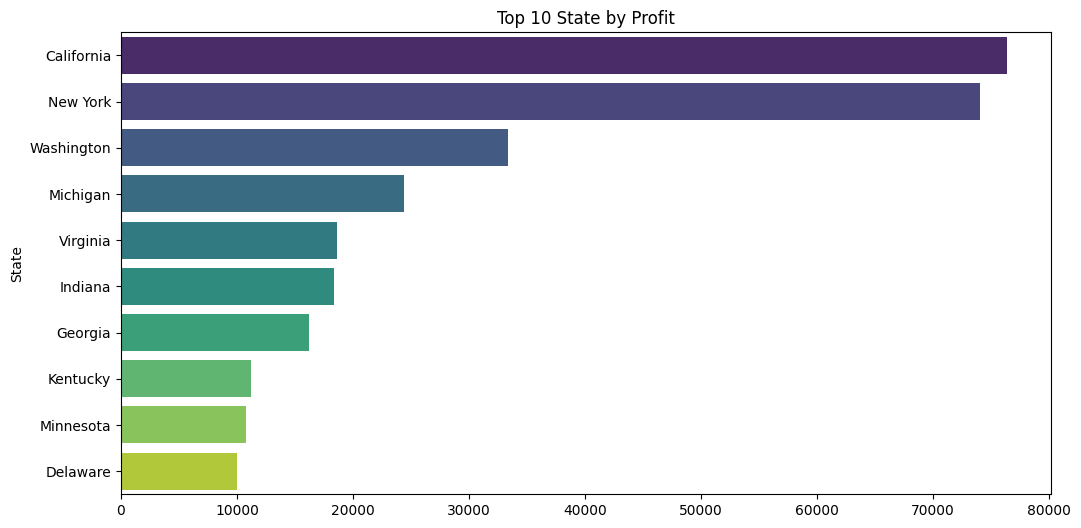

In [48]:
top_profit=clean_data.groupby("State").Profit.sum().sort_values(ascending = False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_profit.values, y=top_profit.index, palette="viridis")
plt.title("Top 10 State by Profit")
plt.show()

### 6.Shipping Mode Analysis


Text(0.5, 1.0, 'Shipping Mode Analysis')

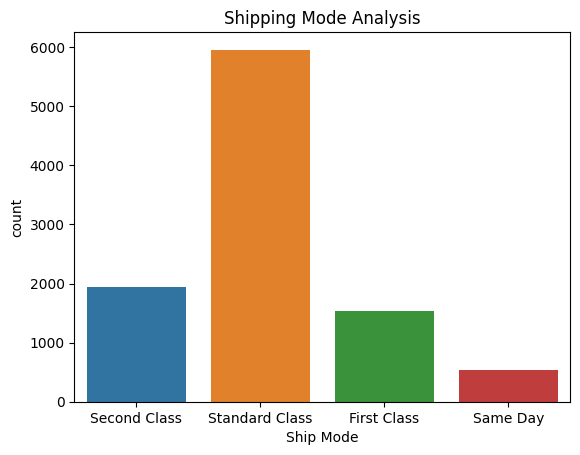

In [59]:
sns.countplot(x="Ship Mode", data=clean_data)
plt.title("Shipping Mode Analysis")

### 7. Segment Analysis

Text(0.5, 1.0, 'Customer Segment Analysis')

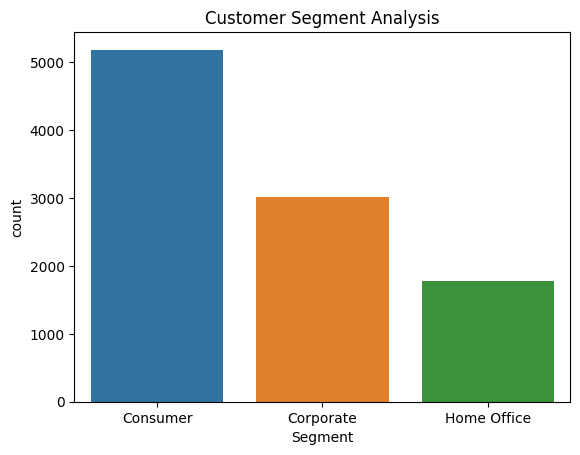

In [60]:
sns.countplot(x="Segment", data=clean_data)
plt.title("Customer Segment Analysis")

### 8.representation of category depend on quantity

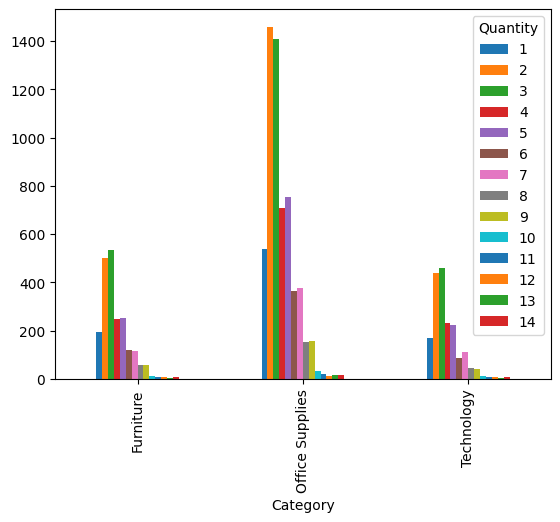

In [61]:
clean_data.groupby(['Category','Quantity']).size().unstack().plot(kind='bar',stacked=False, legend=True)
plt.show()

# Total quantity ordered for  Sub-Category and Category

In [49]:

grouped_df =  clean_data.groupby(['Category', 'Sub-Category',]).apply(lambda data: data.Quantity.sum()).reset_index()
grouped_df.rename(columns = {0:"Quantity"}, inplace = True)
sorted_grouped_df = grouped_df.groupby('Category', group_keys=False).apply(lambda x: x.sort_values("Quantity", ascending=False))
sorted_grouped_df.index = range(len(sorted_grouped_df))
print(sorted_grouped_df)

           Category Sub-Category  Quantity
0         Furniture  Furnishings      3560
1         Furniture       Chairs      2351
2         Furniture       Tables      1241
3         Furniture    Bookcases       868
4   Office Supplies      Binders      5971
5   Office Supplies        Paper      5144
6   Office Supplies      Storage      3158
7   Office Supplies          Art      2996
8   Office Supplies   Appliances      1729
9   Office Supplies       Labels      1396
10  Office Supplies    Fasteners       914
11  Office Supplies    Envelopes       906
12  Office Supplies     Supplies       647
13       Technology       Phones      3289
14       Technology  Accessories      2976
15       Technology     Machines       440
16       Technology      Copiers       234


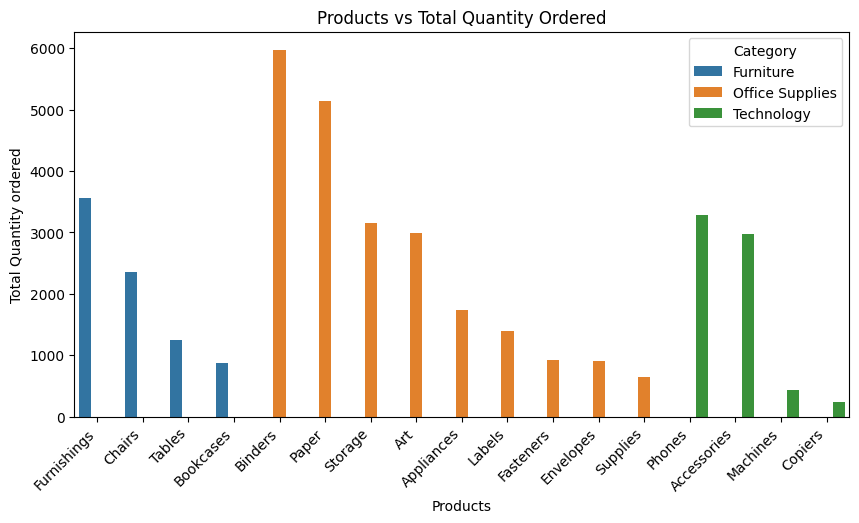

In [50]:
plt.figure(figsize=(10, 5))
sns.barplot(data=sorted_grouped_df, x='Sub-Category', y='Quantity', hue='Category')
plt.xlabel("Products")
plt.xticks(rotation=45, ha='right')
plt.ylabel("Total Quantity ordered")
plt.title("Products vs Total Quantity Ordered")
plt.legend(title="Category")
plt.show()

### Sales, Profit and Discount for each Sub-Category and Segment

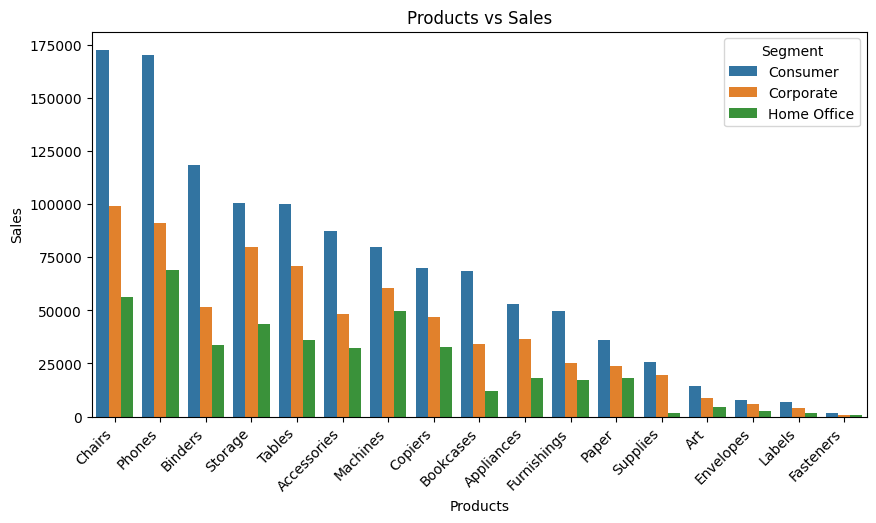

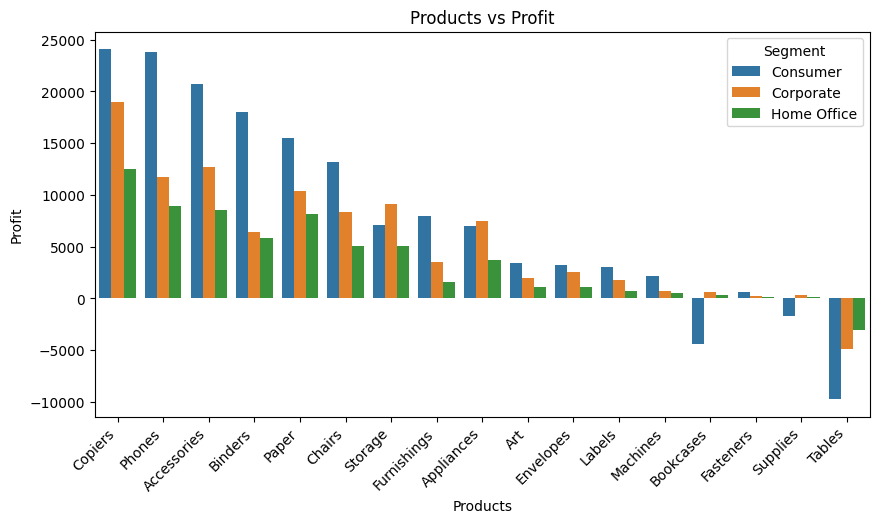

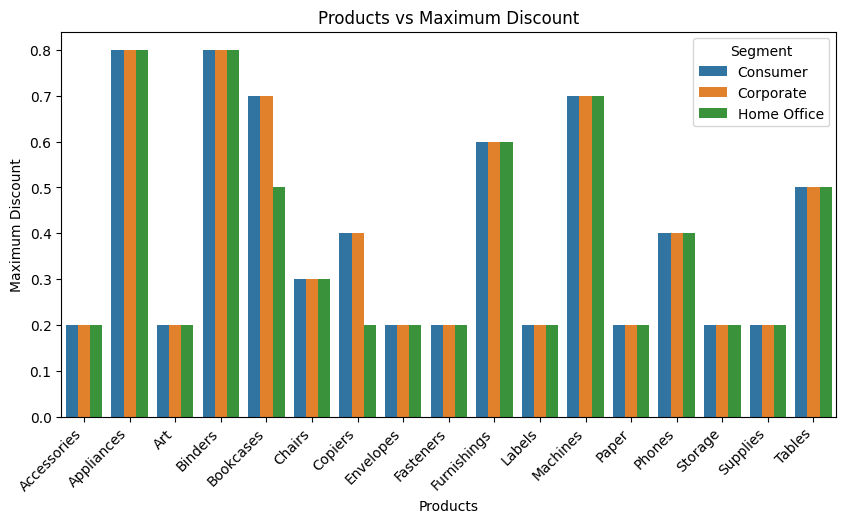

In [52]:
grouped_df1 = clean_data.groupby(["Sub-Category","Segment"])["Sales"].sum().reset_index().sort_values(by = ["Sales"], ascending = False)
plt.figure(figsize=(10, 5))
sns.barplot(data = grouped_df1, x='Sub-Category', y='Sales', hue='Segment')
plt.xlabel("Products")
plt.xticks(rotation=45, ha='right')
plt.ylabel("Sales")
plt.title("Products vs Sales")
plt.legend(title="Segment")

grouped_df2 = clean_data.groupby(["Sub-Category","Segment"])["Profit"].sum().reset_index().sort_values(by = ["Profit"], ascending = False)
plt.figure(figsize=(10, 5))
sns.barplot(data = grouped_df2, x='Sub-Category', y='Profit', hue='Segment')
plt.xlabel("Products")
plt.xticks(rotation=45, ha='right')
plt.ylabel("Profit")
plt.title("Products vs Profit")
plt.legend(title="Segment")

grouped_df3 = clean_data.groupby(["Sub-Category","Segment"])["Discount"].agg([max]).reset_index()
plt.figure(figsize=(10, 5))
sns.barplot(data = grouped_df3, x='Sub-Category', y='max', hue='Segment')
plt.xlabel("Products")
plt.xticks(rotation=45, ha='right')
plt.ylabel("Maximum Discount")
plt.title("Products vs Maximum Discount")
plt.legend(title="Segment")
plt.show()

### Comparision between Discount and Total Sales Based on Category

In [54]:

grouped_df5 = clean_data.groupby(["Discount","Category"])["Sales"].sum().reset_index()
print(grouped_df5)

    Discount         Category        Sales
0       0.00        Furniture  255613.1600
1       0.00  Office Supplies  441931.2000
2       0.00       Technology  389733.2000
3       0.10        Furniture   46634.2470
4       0.10  Office Supplies    4324.1490
5       0.10       Technology    3410.9550
6       0.15        Furniture   27558.5215
7       0.20        Furniture  216631.0160
8       0.20  Office Supplies  232960.3120
9       0.20       Technology  314913.6160
10      0.30        Furniture   99188.9780
11      0.30       Technology    3756.3050
12      0.32        Furniture   14493.4588
13      0.40        Furniture   45614.4060
14      0.40       Technology   70803.3780
15      0.45        Furniture    5484.9740
16      0.50        Furniture   20983.4700
17      0.50       Technology   37935.0700
18      0.60        Furniture    6644.7000
19      0.70        Furniture    2459.3820
20      0.70  Office Supplies   22559.3910
21      0.70       Technology   15601.5090
22      0.8

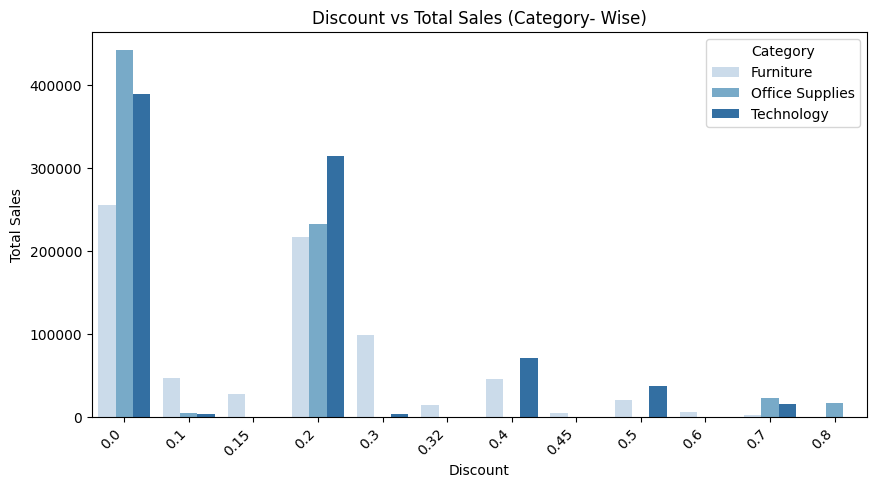

In [55]:
plt.figure(figsize=(10, 5))
sns.barplot(data= grouped_df5, x='Discount', y='Sales', hue='Category',  palette='Blues')
plt.xlabel("Discount")
plt.xticks(rotation=45, ha='right')
plt.ylabel("Total Sales")
plt.title("Discount vs Total Sales (Category- Wise)")
plt.legend(title="Category", loc='upper right')
plt.show()

### Comparision between Discount and Total Profit Based on Category

In [57]:
grouped_df6 = clean_data.groupby(["Discount","Category"])["Profit"].sum().reset_index()
print(grouped_df6)

    Discount         Category       Profit
0       0.00        Furniture   58091.5585
1       0.00  Office Supplies  130404.4284
2       0.00       Technology  132348.4204
3       0.10        Furniture    7111.0119
4       0.10  Office Supplies    1086.0808
5       0.10       Technology     832.0843
6       0.15        Furniture    1418.9915
7       0.20        Furniture    6265.9491
8       0.20  Office Supplies   38008.0522
9       0.20       Technology   46032.6057
10      0.30        Furniture  -10683.2581
11      0.30       Technology     326.0395
12      0.32        Furniture   -2391.1377
13      0.40        Furniture  -16187.3968
14      0.40       Technology   -6869.6536
15      0.45        Furniture   -2493.1111
16      0.50        Furniture  -12871.1990
17      0.50       Technology   -7635.2291
18      0.60        Furniture   -5944.6552
19      0.70        Furniture   -3894.9394
20      0.70  Office Supplies  -16601.0984
21      0.70       Technology  -19579.3191
22      0.8

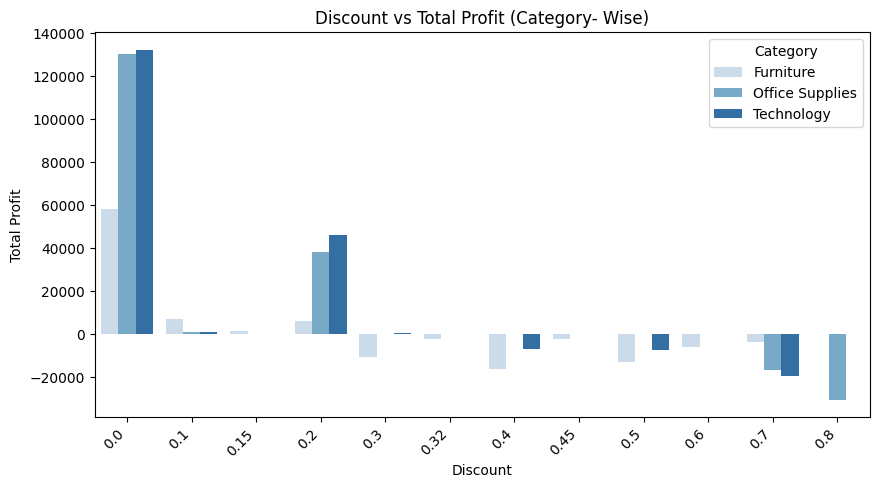

In [58]:
plt.figure(figsize=(10, 5))
sns.barplot(data= grouped_df6, x='Discount', y='Profit', hue='Category',  palette='Blues')
plt.xlabel("Discount")
plt.xticks(rotation=45, ha='right')
plt.ylabel("Total Profit")
plt.title("Discount vs Total Profit (Category- Wise)")
plt.legend(title="Category", loc='upper right')
plt.show()